In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [3]:
from nba_api.stats.endpoints.playergamelog import PlayerGameLog

In [4]:
season_stats = LeagueDashPlayerStats(per_mode_detailed='PerGame')

In [5]:
stats_df = season_stats.get_data_frames()[0]

In [6]:
stats_df = stats_df.sort_values(by='PTS', ascending=False)

In [7]:
top_5 = stats_df.iloc[:5]

In [8]:
def points_each_game_for_player_and_counts(player_id, player_name):
    game_log = PlayerGameLog(player_id=player_id)
    game_log_df = game_log.get_data_frames()[0]
    score_counts = game_log_df.PTS.value_counts()
    counts_for_each = []
    game_log_df.loc[:, 'PLAYER_NAME'] = player_name
    points = game_log_df.PTS.tolist()
    for point in points:
        counts_for_each.append(score_counts.loc[point])
    return game_log_df

In [9]:
player_name_pts_dict = dict()
for (player_id, player_name) in zip(top_5.PLAYER_ID.tolist(), top_5.PLAYER_NAME.tolist()):
    player_name_pts_dict[player_name] = points_each_game_for_player_and_counts(player_id, player_name)
    print(player_name)

Stephen Curry
James Harden
Kevin Durant
LeBron James
Anthony Davis


In [10]:
concated_dfs = pd.concat(player_name_pts_dict.values())

In [11]:
plt.style.use('fivethirtyeight')

In [12]:
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [13]:
def set_background_color(color, ax, fig):
    ax.set_facecolor(color)
    fig.set_facecolor(color)

In [14]:
def title_and_text_colors(title, color, ax):
    plt.title(title, color=color, fontsize=23, x=0.45)
    ax.tick_params(axis='both', colors=color, labelsize=15)
    ax.grid(b=False, axis='x')
    ax.grid(b=True, axis='y', color=color)
    plt.xlabel("Points", color=color, fontsize=17, x=0.45)
    plt.ylabel("")
    plt.text(x=47, y=4.9, s='instagram: bballytics', color=color)
    plt.text(x=2, y=4.9, s='github.com/danchyy/Basketball_Analytics', color=color)

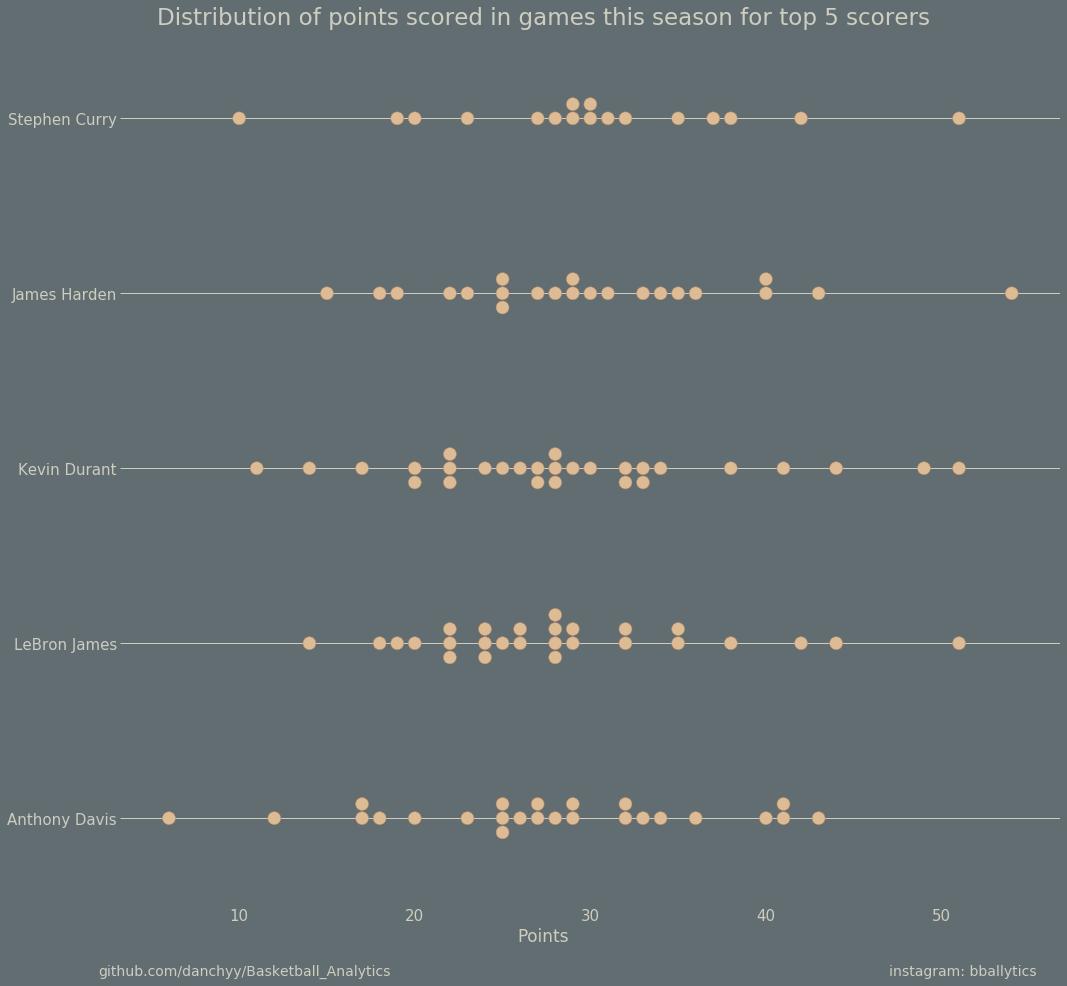

In [15]:
plt.figure(figsize=(15, 15))

sns.swarmplot(
    x="PTS",
    y="PLAYER_NAME",
    data=concated_dfs,
    size=13,
    color="#DDBC95",
    edgecolor="#B38867",
    linewidth=0.5
)

ax = plt.gca()
fig = plt.gcf()

set_background_color(color='#626D71', ax=ax, fig=fig)
remove_spines(ax)

title = 'Distribution of points scored in games this season for top 5 scorers'
title_and_text_colors(title, '#CDCDC0', ax)
